In [2]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wine-quality-dataset/WineQT.csv


In [3]:
data = pd.read_csv("wine-quality-dataset/WineQT.csv")
data.shape

(1143, 13)

In [4]:
data.tail() #Id != Index

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597

## EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
data.describe() #The ranges needs to be normalized

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [7]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

(0.0, 100.0)

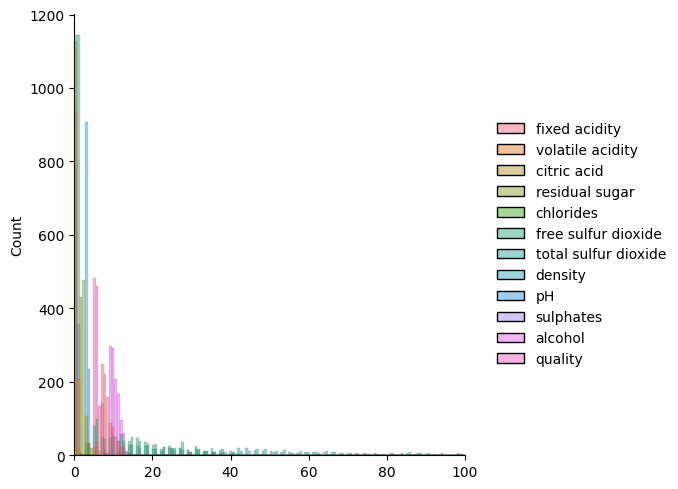

In [40]:
sns.displot(data[data.columns[:-1]])
plt.xlim(0,100)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

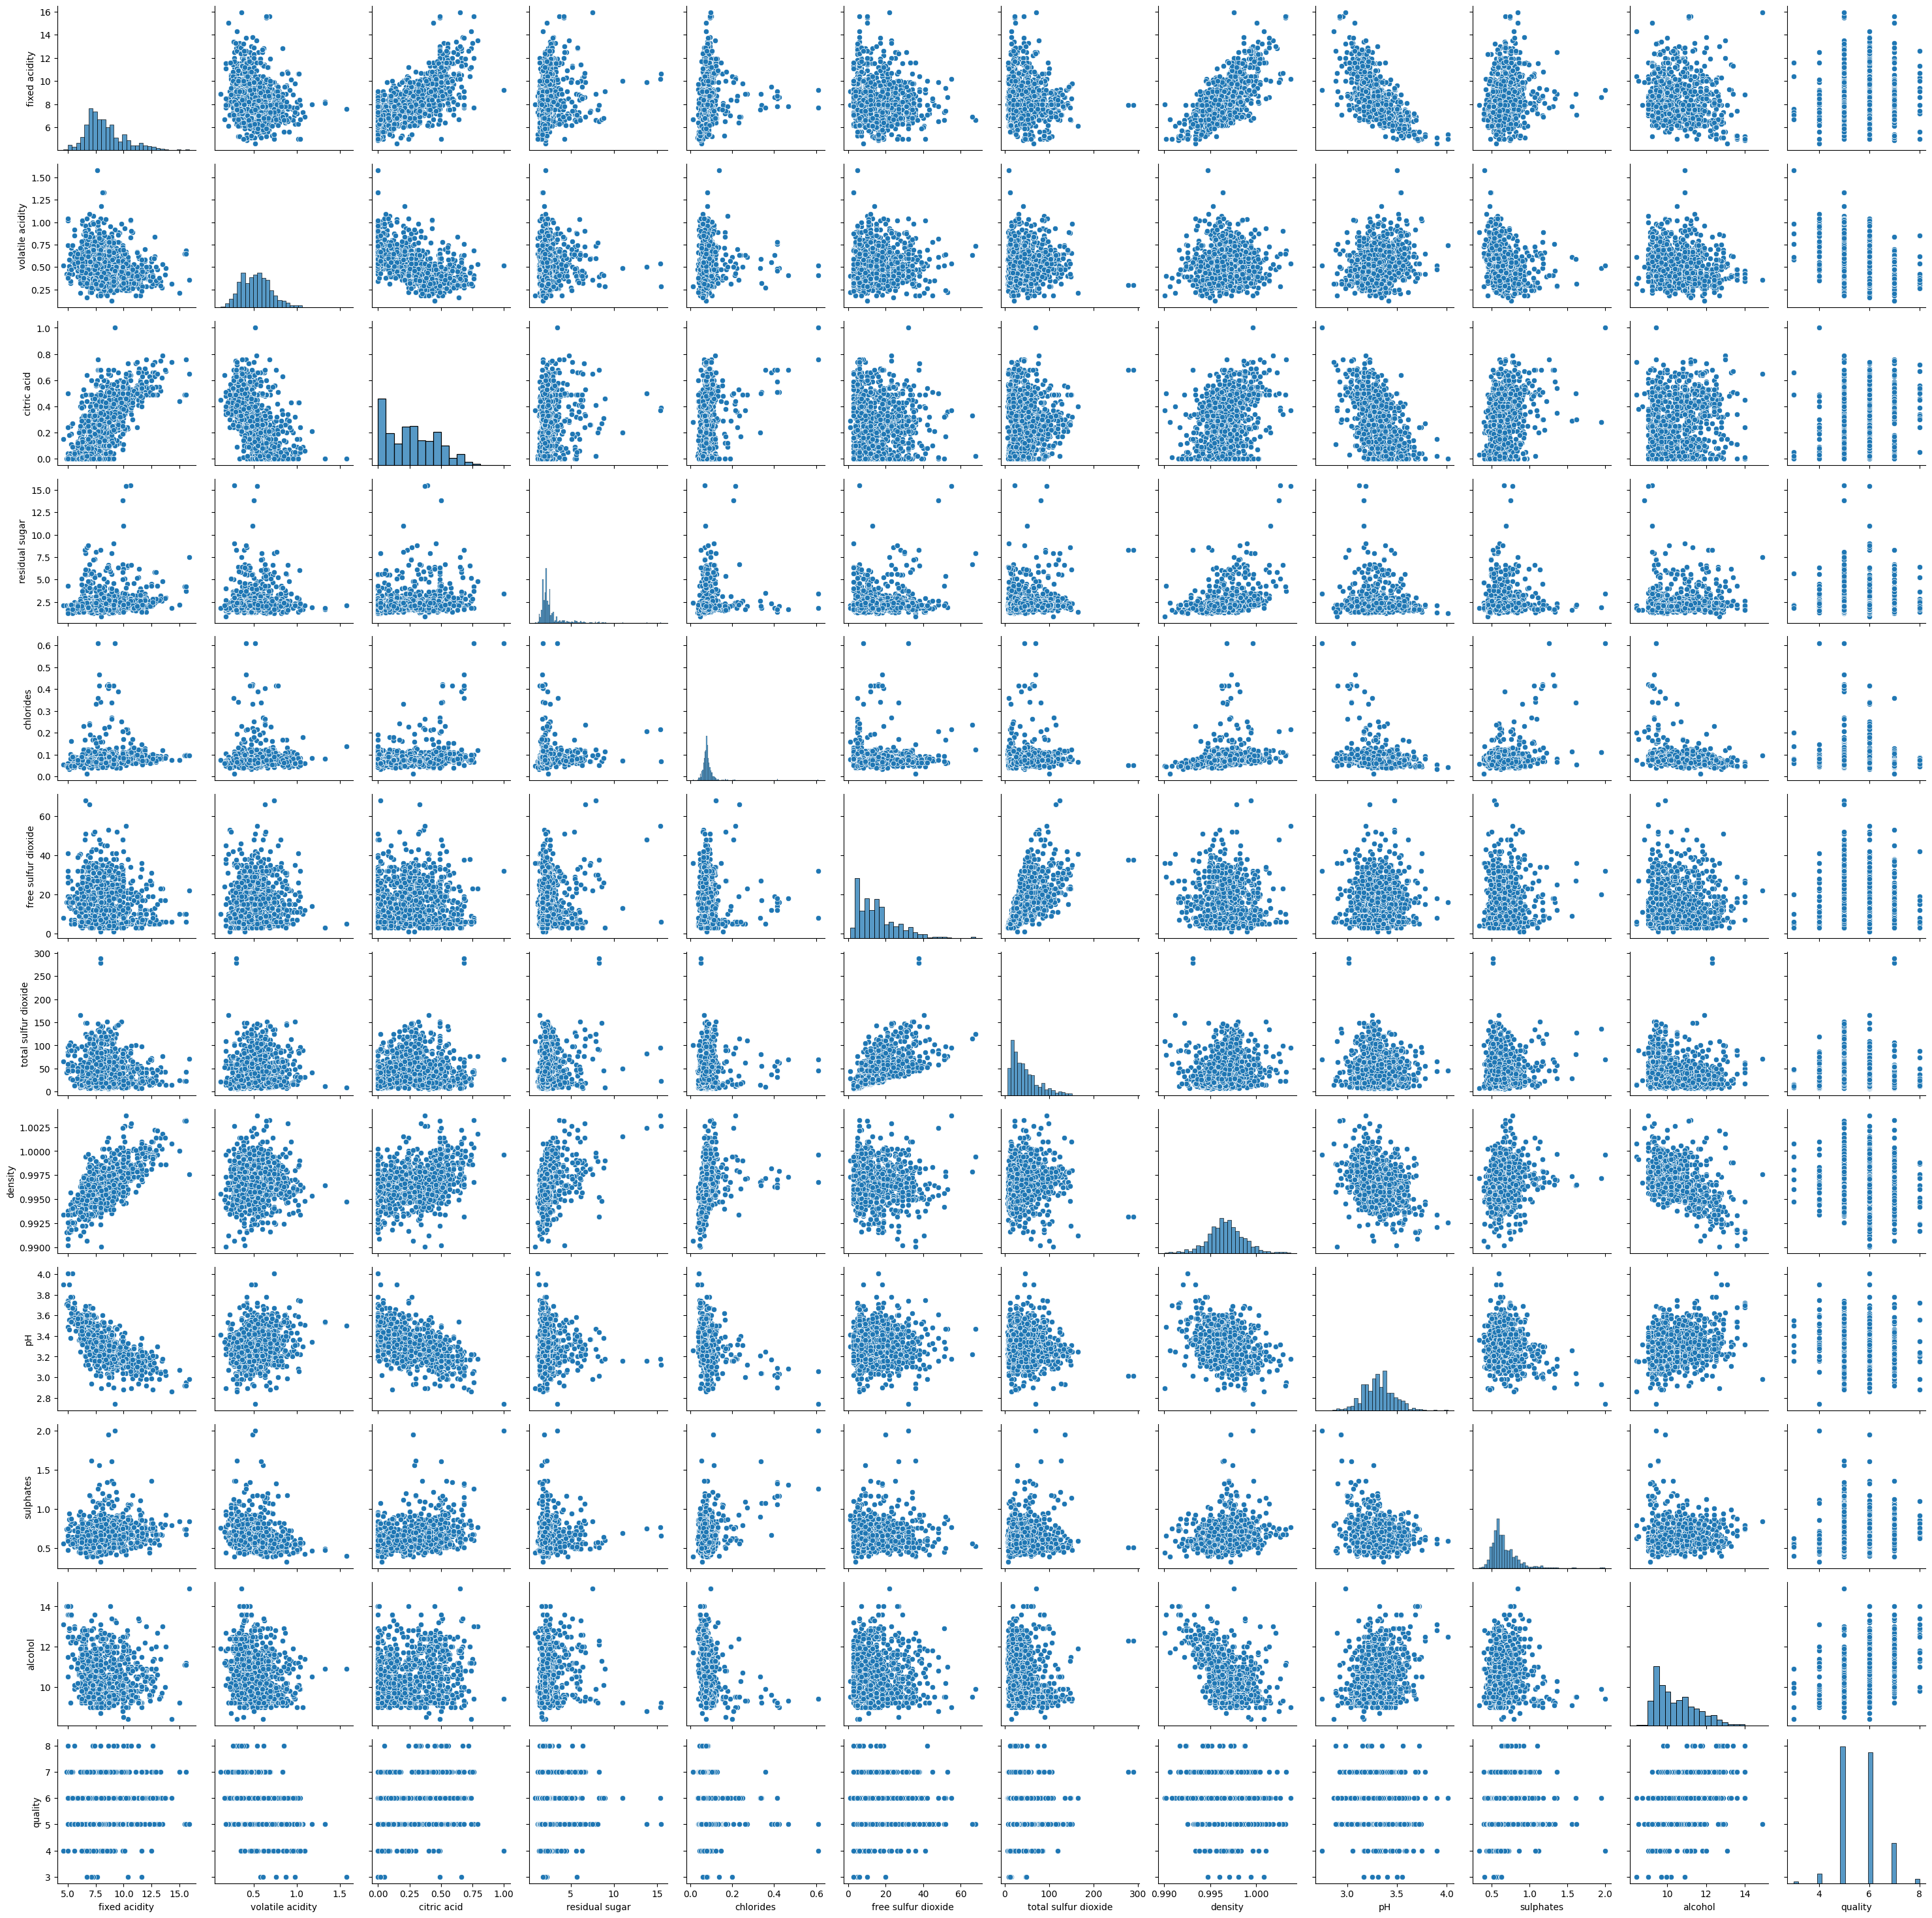

In [41]:
g = sns.PairGrid(data[data.columns[:-1]])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [9]:
data['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

(array([  6.,   0.,  33.,   0., 483.,   0., 462.,   0., 143.,  16.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

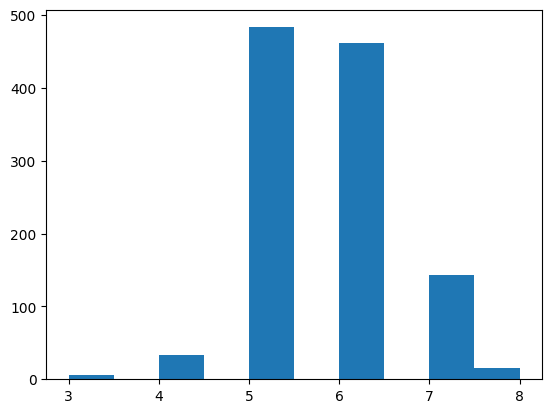

In [10]:
plt.hist(data["quality"])

<Axes: >

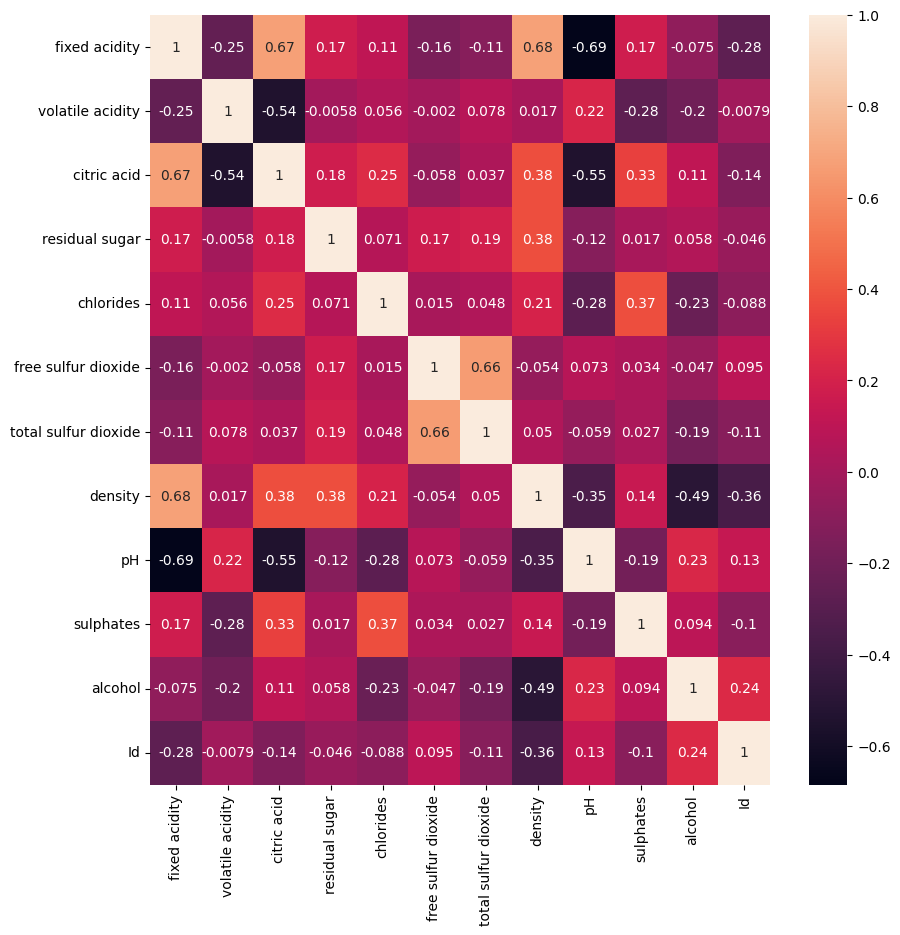

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) # Sample figsize in inches
explore = data.copy()
explore = explore.drop(columns="quality")
sns.heatmap(explore.corr(), annot=True) 

In [12]:
#Remove correlated columns (fixed acidity, citric acid, density, ph), (volatile acidity, citric acid, quality), (citric acid, volatile acid, ph), (free sulfuur dioxide, total sulfur dioxide), (density, alcohol, id, fixed acidity, citric acid, residual sugar), (ph, citric acid, fixed acidity), (alcohol, density, )

In [13]:
correlated = explore.corr().abs()
mask = np.triu(np.ones_like(correlated, dtype=bool))
tri_data = correlated.mask(mask)

<Axes: >

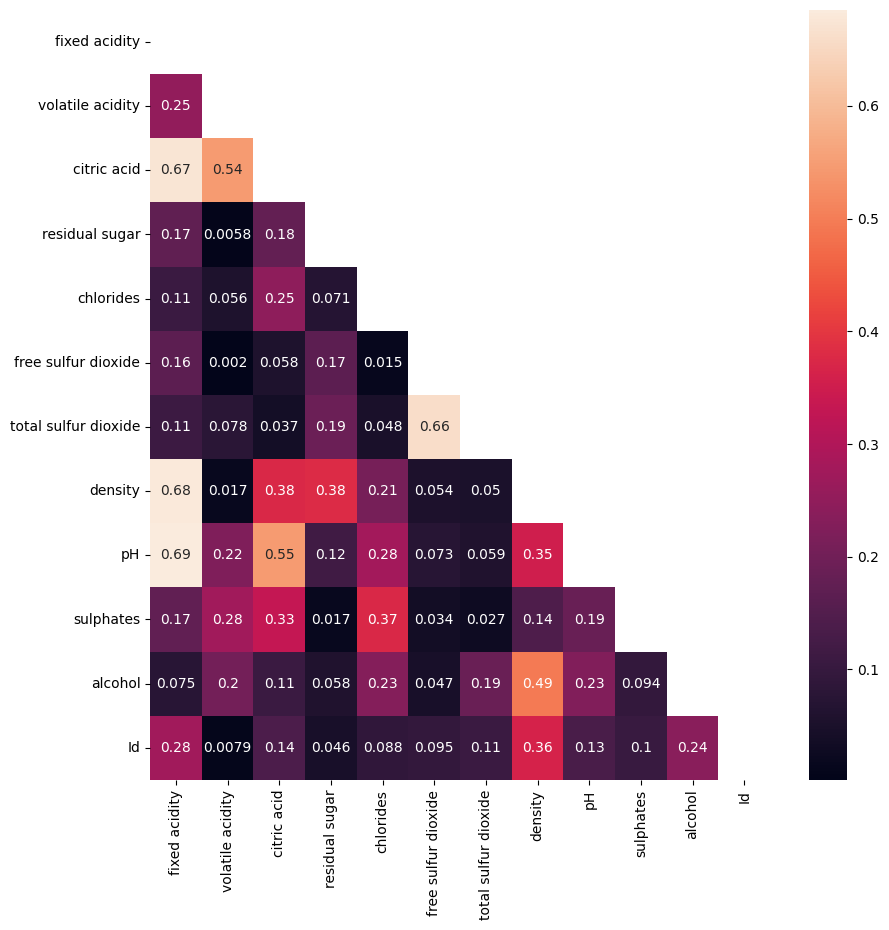

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(tri_data, annot=True)

In [15]:
highly_correlated_cols = [col for col in tri_data.columns if any(tri_data[col]>0.5)]

In [16]:
len(highly_correlated_cols), tri_data.columns.shape
# any(tri_data["Id"]>0.9)
# tri_data
highly_correlated_cols

['fixed acidity', 'volatile acidity', 'citric acid', 'free sulfur dioxide']

In [17]:
explore.drop(highly_correlated_cols, axis=1, inplace=True)

## Drop Outlires 

In [18]:
explore["quality"] = data["quality"]
explore = explore.drop("Id", axis = 1)

In [19]:
data_filtered = pd.DataFrame()
for col in explore.columns:
        Q1 = explore[col].quantile(0.1)
        Q3 = explore[col].quantile(0.9)
        IQR = Q3 - Q1
        lower_bound = Q1 - IQR
        upper_bound = Q3 + IQR
        data_filtered[col] = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)][col]

In [20]:
d_filtered = pd.DataFrame()
for col in explore.columns:
    low, high = data[col].quantile([0.1, 0.9])
    d_filtered[col] = explore[(explore[col]>=low)&(explore[col]<=high)][col]
# low, high

In [21]:
# data_filtered.drop(highly_correlated_cols, axis=1, inplace=True)
data_filtered.dropna()
data_filtered.shape, d_filtered.shape

((1095, 8), (933, 8))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

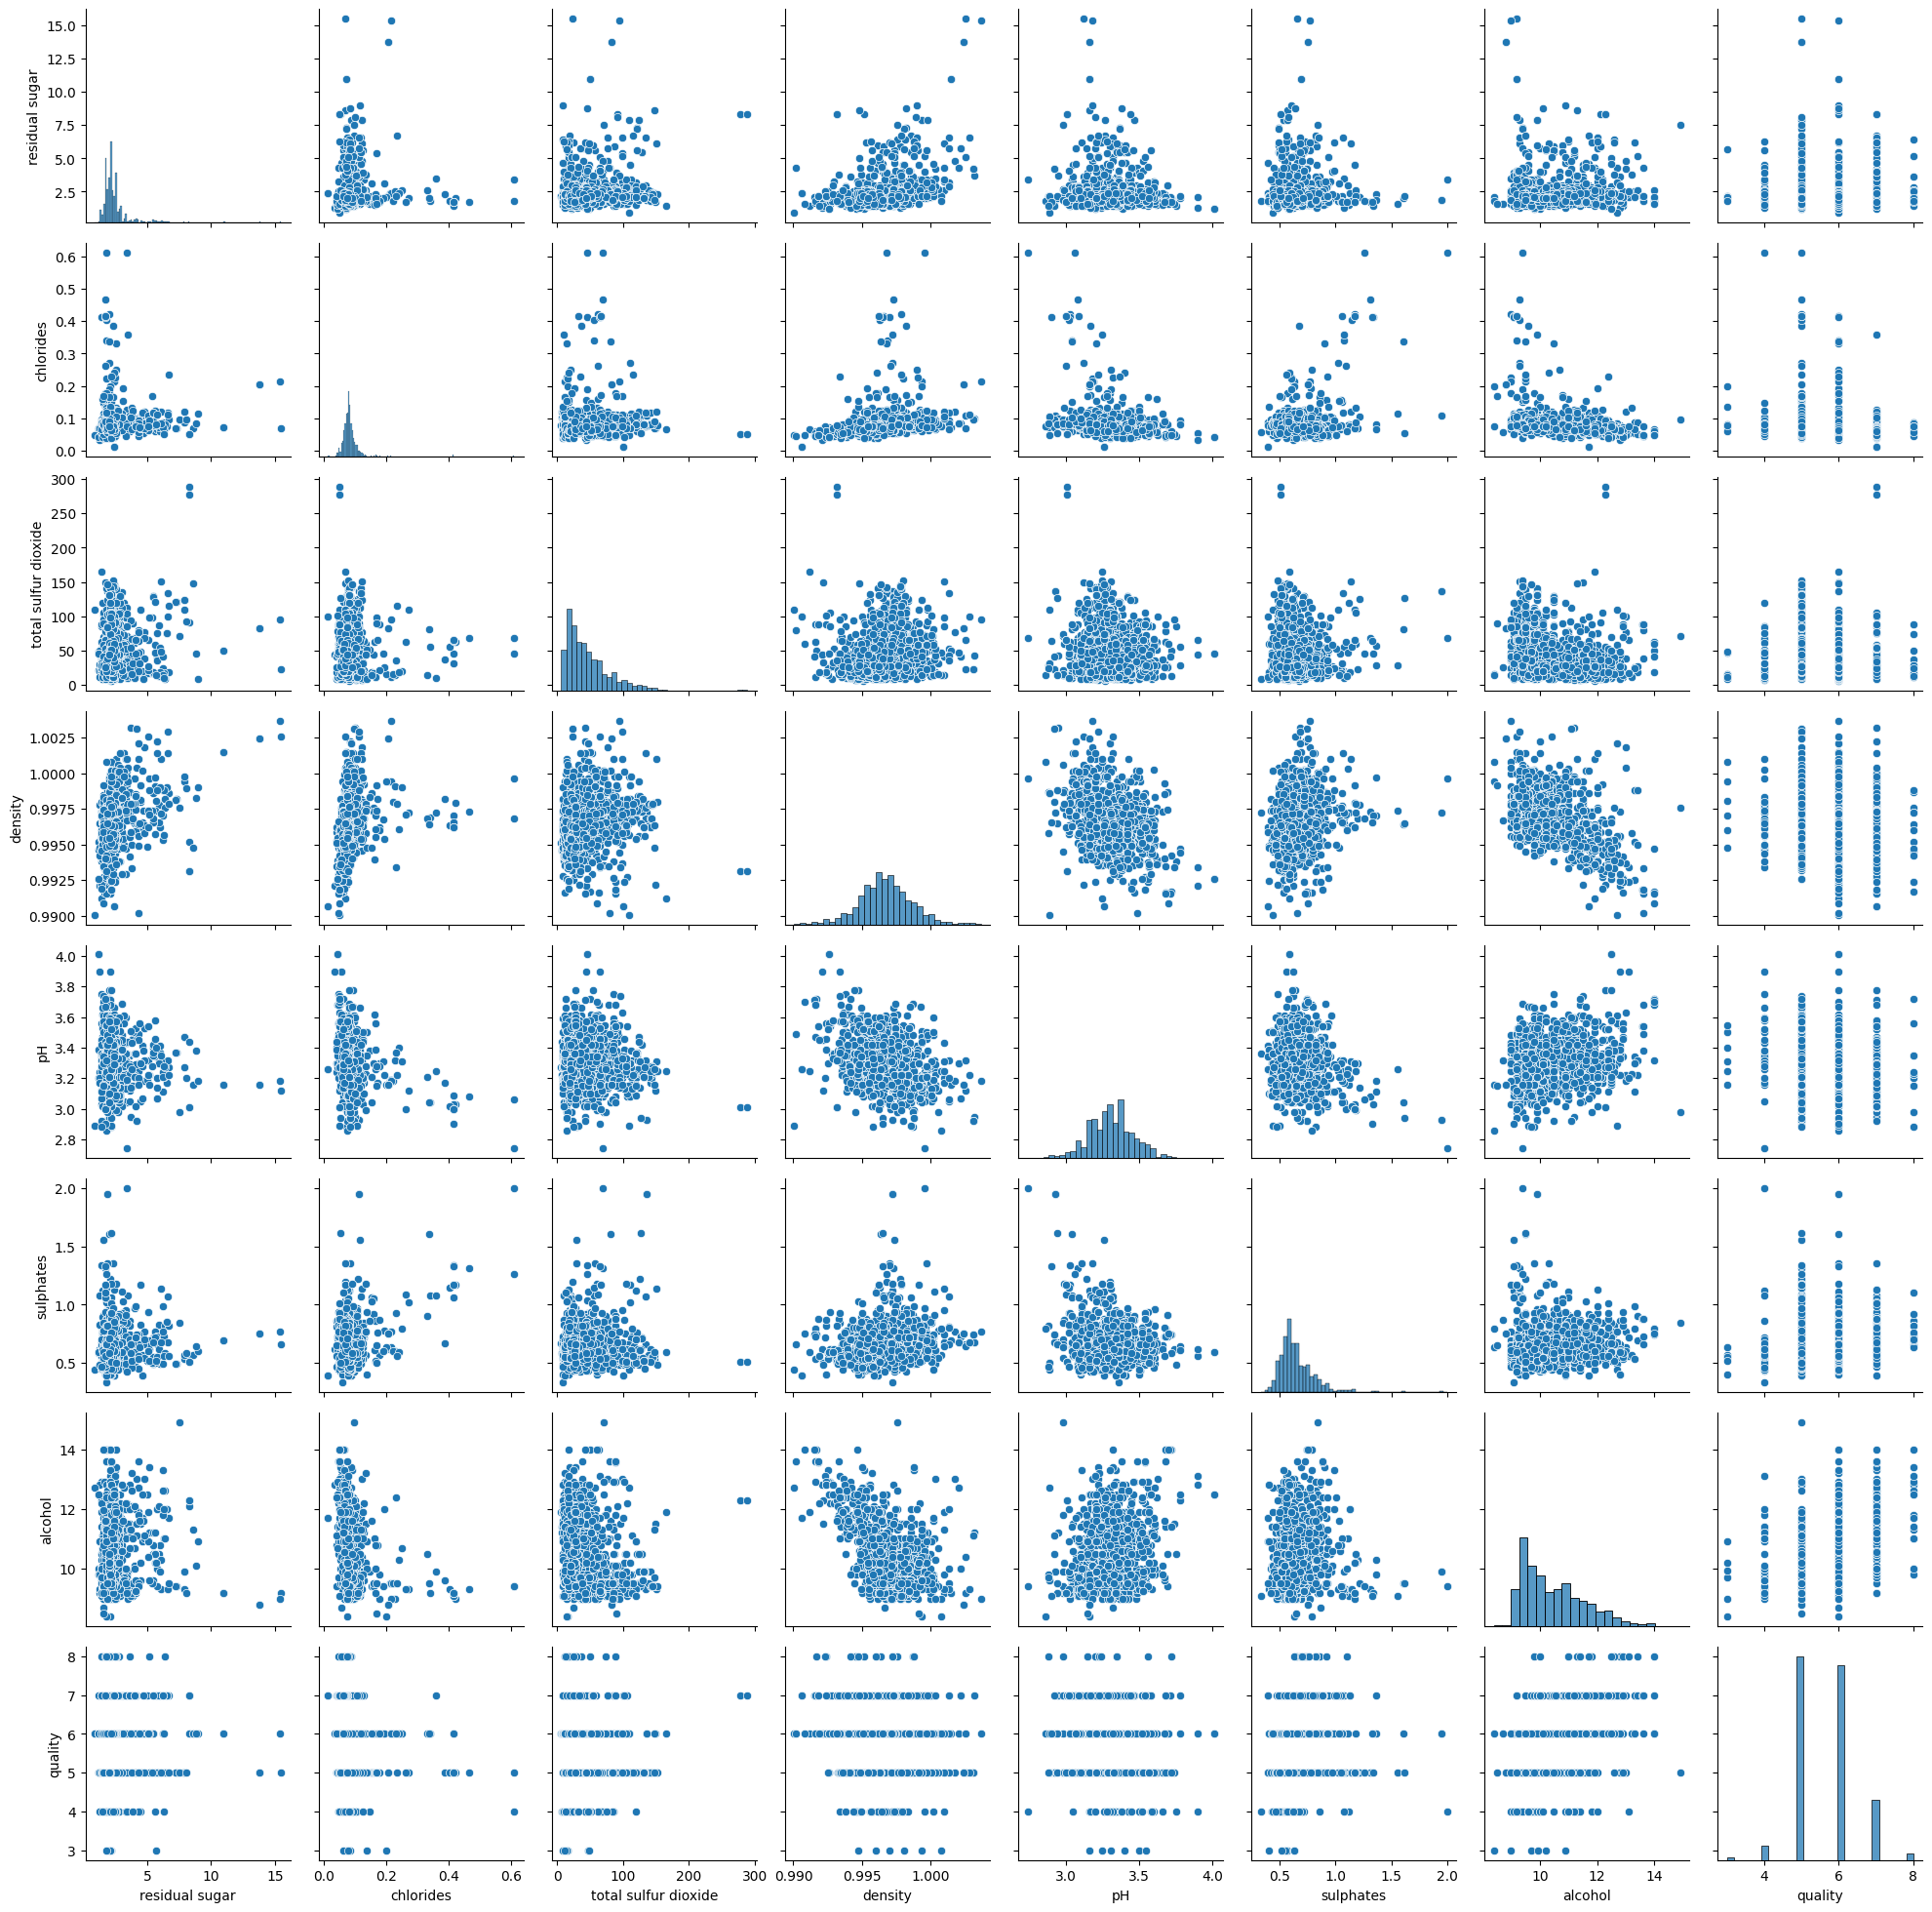

In [44]:
# explore = explore[(explore.quality>low) &( explore.quality<high)]
g1 = sns.PairGrid(explore)
g1.map_diag(sns.histplot)
g1.map_offdiag(sns.scatterplot)

In [23]:
data_filtered.dropna(inplace=True)
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 1142
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   residual sugar        1044 non-null   float64
 1   chlorides             1044 non-null   float64
 2   total sulfur dioxide  1044 non-null   float64
 3   density               1044 non-null   float64
 4   pH                    1044 non-null   float64
 5   sulphates             1044 non-null   float64
 6   alcohol               1044 non-null   float64
 7   quality               1044 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 73.4 KB


In [53]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
# explore = explore.drop("Id", axis = 1)
d_filtered.describe()

residual sugar   chlorides  total sulfur dioxide     density  \
count      933.000000  774.000000            780.000000  761.000000   
mean         2.253483    0.079966             40.837179    0.996703   
std          0.407021    0.010704             20.557766    0.001126   
min          1.700000    0.060000             14.000000    0.994580   
25%          2.000000    0.073000             24.000000    0.995800   
50%          2.200000    0.079000             36.000000    0.996700   
75%          2.500000    0.086000             54.000000    0.997600   
max          3.600000    0.107000             91.000000    0.999100   

               pH   sulphates     alcohol     quality  
count  758.000000  766.000000  793.000000  894.000000  
mean     3.309037    0.633747   10.311433    5.681208  
std      0.098970    0.088464    0.781097    0.679358  
min      3.120000    0.500000    9.300000    5.000000  
25%      3.230000    0.560000    9.600000    5.000000  
50%      3.310000    0.620000   10.100000    6.000000  
75%      3.380000    0.690000   10.900000    6.000000  
max      3.510000    0.850000   12.000000    7.000000

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

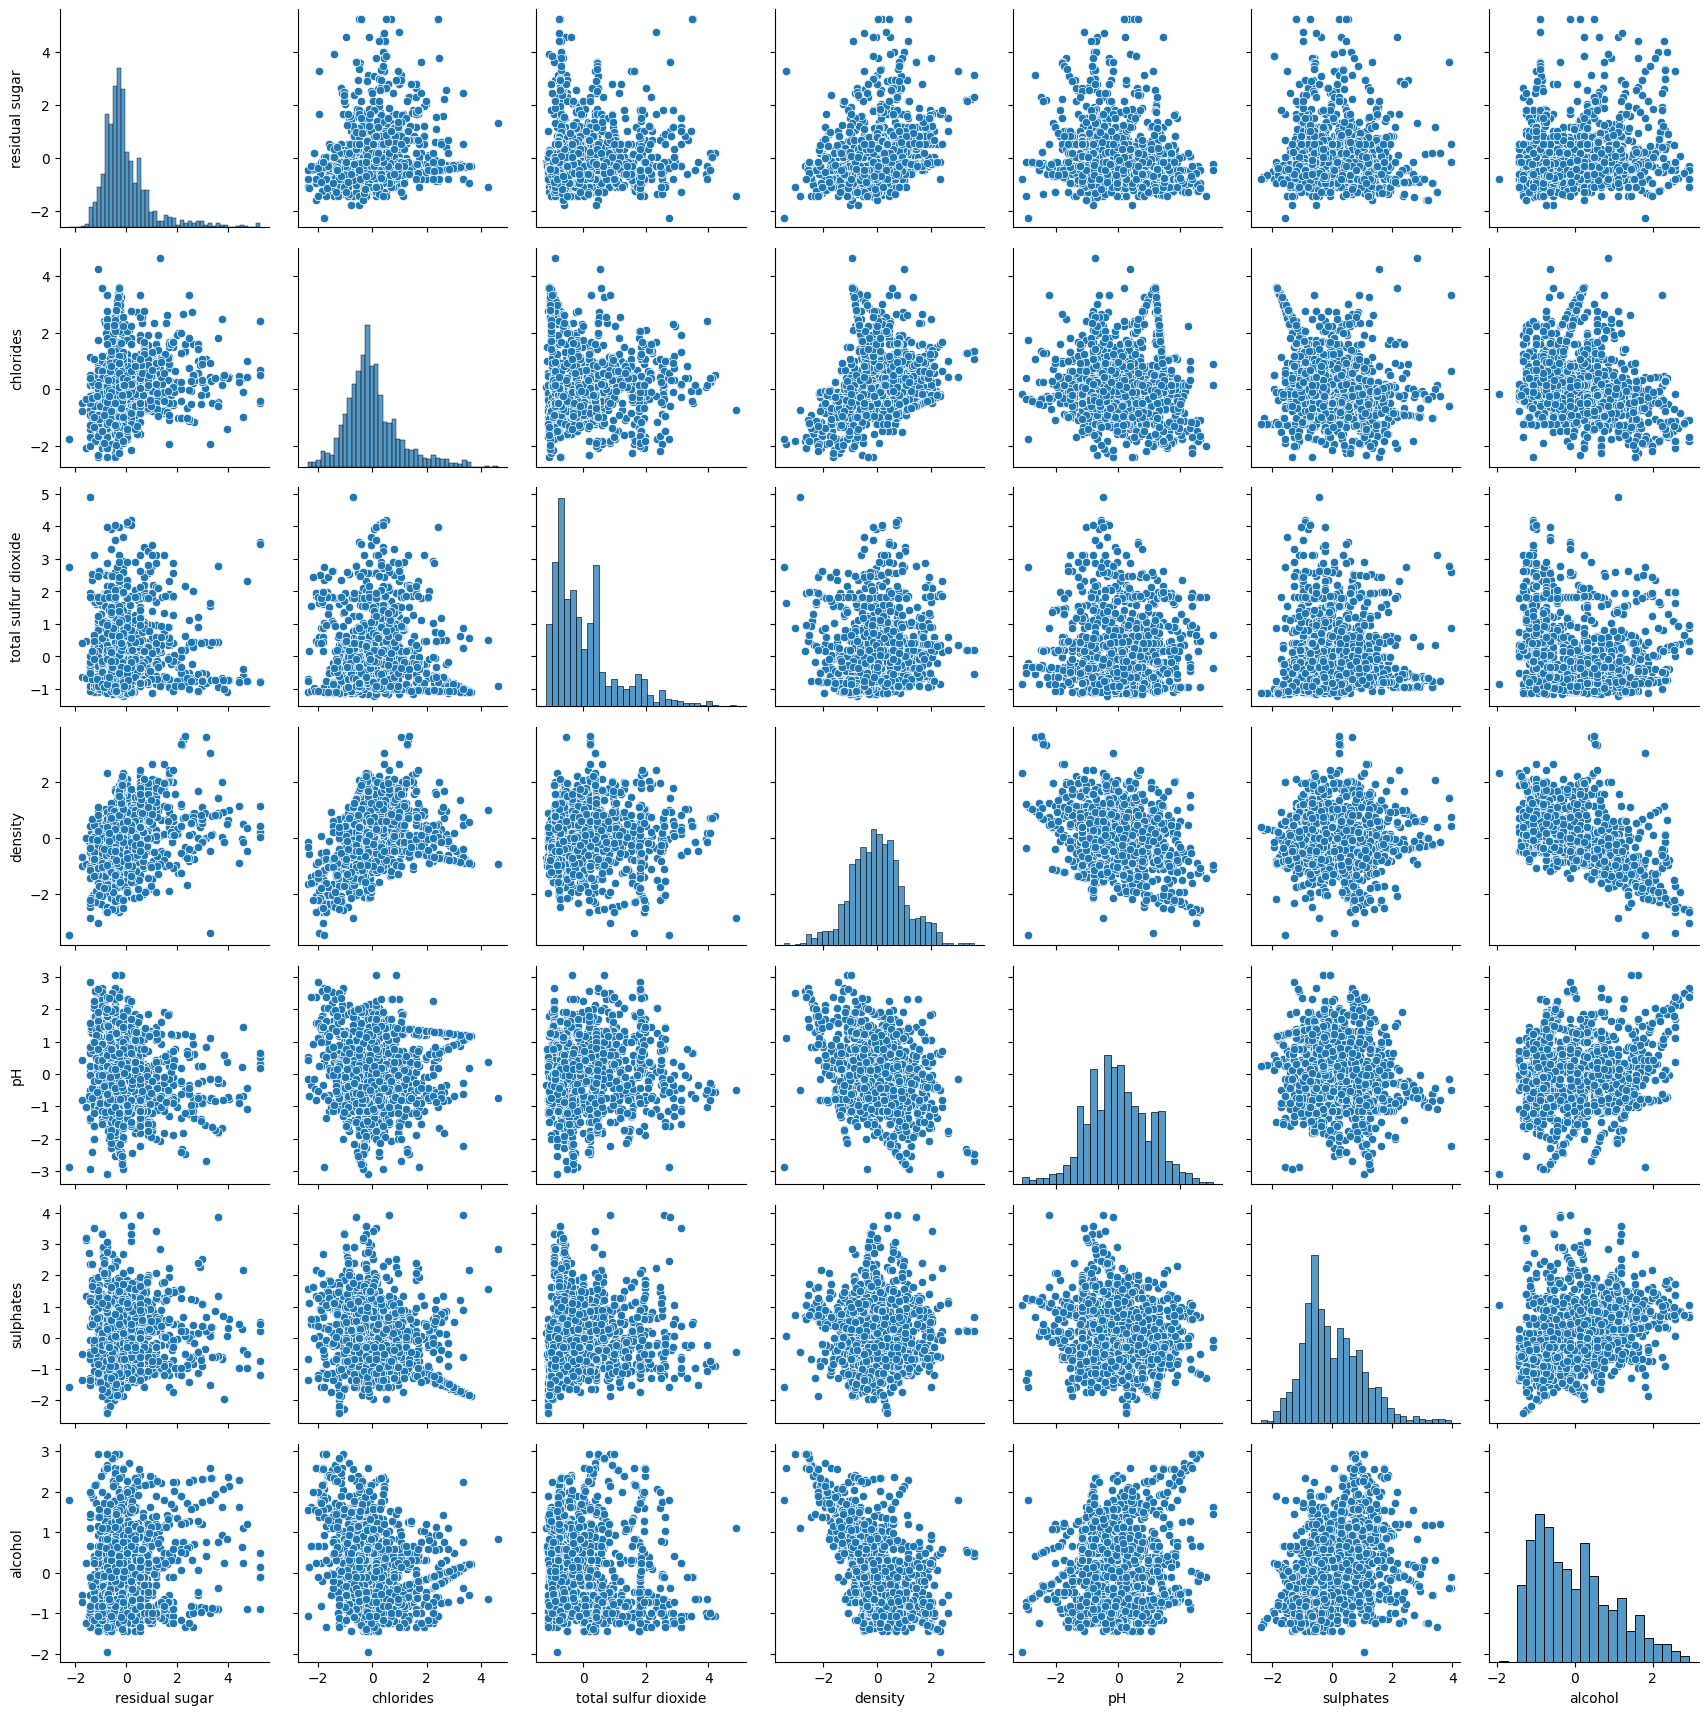

In [54]:
g2 = sns.PairGrid(pd.DataFrame(X_train_scaled, columns=explore.columns[:-1]))
g2.map_diag(sns.histplot)
g2.map_offdiag(sns.scatterplot)

## Balancing Data

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_resample(data_filtered[data_filtered.columns[:-1]], data_filtered.quality)

In [26]:
y_train_smote.value_counts()

quality
5    441
6    441
7    441
4    441
8    441
3    441
Name: count, dtype: int64

## Modeling

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.3) #70% Train, 30% test and validation
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1852, 7), (794, 7), (1852,), (794,))

In [28]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size= 1/3)
X_test.shape, X_val.shape

((529, 7), (265, 7))

In [29]:
# data["quality"].unique(), data["quality"].value_counts()/data.shape[0]
data.quality.value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [30]:
weights = data["quality"].value_counts()/data.shape[0]
weights = weights.to_dict()
weights

{5: 0.4225721784776903,
 6: 0.4041994750656168,
 7: 0.12510936132983377,
 4: 0.028871391076115485,
 8: 0.01399825021872266,
 3: 0.005249343832020997}

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dr = DecisionTreeClassifier(
#     class_weight = weights
)
model1 = Pipeline([("Scaler", StandardScaler()), ("model", dr)])

In [32]:
model1.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('model', DecisionTreeClassifier())])

In [58]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# y_val_pred = model1.predict(X_val)
# print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred)}")

In [34]:
rf = RandomForestClassifier(
#     class_weight = weights
)
model2 = Pipeline([("Scaler", StandardScaler()), ("model", rf)])

In [35]:
model2.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [37]:
linearsvc = LinearSVC(max_iter=10000000, C = 10
#     class_weight=weights
)
model3 = Pipeline([("Scaler", StandardScaler()), ("model", linearsvc)])

In [38]:
model3.fit(X_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('model', LinearSVC(C=10, max_iter=10000000))])

In [56]:
!pip install lazypredict

In [57]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
Lazy_clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = Lazy_clf.fit(X_train, X_test, y_train, y_test)
print(models)

 93%|█████████▎| 27/29 [00:04<00:00,  8.05it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 1852, number of used features: 7
[LightGBM] [Info] Start training from score -1.806994
[LightGBM] [Info] Start training from score -1.806994
[LightGBM] [Info] Start training from score -1.816911
[LightGBM] [Info] Start training from score -1.749470
[LightGBM] [Info] Start training from score -1.746369
[LightGBM] [Info] Start training from score -1.826928
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:07<00:00,  3.99it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.86               0.85    None      0.86   
ExtraTreesClassifier               0.86               0.85    None      0.86   
RandomForestClassifier             0.83               0.82    None      0.83   
LabelPropagation                   0.82               0.81    None      0.81   
LabelSpreading                     0.82               0.81    None      0.81   
DecisionTreeClassifier             0.82               0.81    None      0.82   
BaggingClassifier                  0.81               0.80    None      0.81   
ExtraTreeClassifier                0.78               0.76    None      0.77   
KNeighborsClassifier               0.77               0.75    None      0.75   
SVC                                0.75      